In [54]:
from PIL import Image
from numpy import *
from pylab import *
import ransac
import sift
import harris

In [7]:
featname = ['climbing_'+str(i+1)+'_small.sift' for i in range(2)]
imname = ['climbing_'+str(i+1)+'_small.jpg' for i in range(2)]
l = {}
d = {}
for i in range(2):
    sift.process_image(imname[i],featname[i])
    l[i],d[i] = sift.read_features_from_file(featname[i])
#    l[i][:,[0,1]] = l[i][:,[1,0]]
    
matches = {}
for i in range(1):
    matches[i] = sift.match(d[i+1],d[i])

processed tmp.pgm to climbing_1_small.sift
processed tmp.pgm to climbing_2_small.sift


In [8]:
from PIL import Image

In [9]:
def convert_points(j):
    ndx = matches[j].nonzero()[0]
    fp = homography.make_homog(l[j+1][ndx, :2].T)
    ndx2 = [int(matches[j][i]) for i in ndx]
    tp = homography.make_homog(l[j][ndx2,:2].T)
    return fp, tp

In [10]:
import homography
homography = reload(homography)

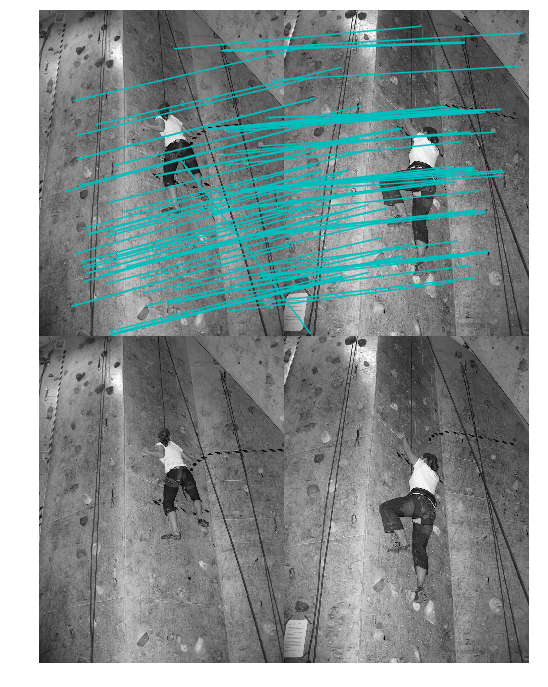

In [12]:
im = [array(Image.open(imname[i]).convert('L')) for i in range(2)]
for i in range(1):
    figure(figsize=(12,12))
    gray()
    sift.plot_matches(im[i+1],im[i],l[i+1],l[i],matches[i])
show()

In [53]:
m = homography.RansacModel()
fp, tp = convert_points(0)
tp1 = []
for i in range(3):
    H, rd = homography.H_from_ransac(fp, tp, m, 1000,5)
    fp1.append(fp[:, rd])
    tp1.append(tp[:, rd])
    fp = np.delete(fp, rd, axis=1)
    tp = np.delete(tp, rd, axis=1)

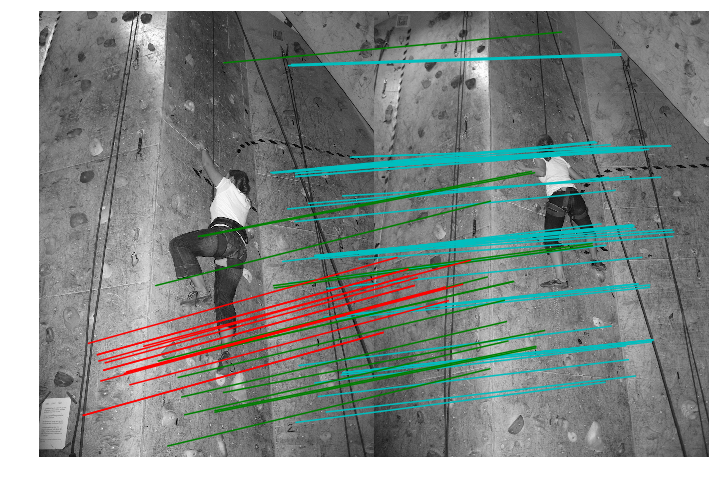

In [76]:
im = [array(Image.open(imname[i]).convert('L')) for i in range(2)]
figure(figsize=(12,12))
gray()
im3 = harris.appendimages(im[0], im[1])
imshow(im3)
for t in range(len(fp1)):
    cols = im[0].shape[1]
    colors = ['c', 'g', 'r', 'k']
    for i in range(len(fp1[t][0])):
        plot([fp1[t][0][i], tp1[t][0][i]+cols], [fp1[t][1][i], tp1[t][1][i]], colors[t])
axis('off')
show()